In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RoILXxeyIqBkITIuYmKf")
project = rf.workspace("tishas-workplace").project("traffic-congestion-detection-vbbnb")
version = project.version(2)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 33.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you have jupyter


Extracting Dataset Version Zip to Traffic-Congestion-Detection-2 in yolov9:: 100%|██████████| 6672/6672 [00:01<00:00, 6497.27it/s]


In [ ]:
# import shutil
# import os

# # Define source and destination directories
# src_directory = "/kaggle/input/tcd-yolov9-model-runs/detect"
# dst_directory = "/kaggle/working/runs/detect"

# # Check if the source directory exists
# if os.path.exists(src_directory):
#     # Copy the entire directory with dirs_exist_ok=True
#     shutil.copytree(src_directory, dst_directory, dirs_exist_ok=True)
#     print(f"Copied {src_directory} to {dst_directory} successfully!")
# else:
#     print(f"Source directory {src_directory} does not exist!")


In [ ]:
pip install matplotlib opencv-python


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import yaml

# Define the new content to be written into the YAML file
new_content = {
    'names': [
        'Bike',
        'Bus',
        'Car',
        'Cng',
        'Cycle',
        'Mini-Truck',
        'People',
        'Rickshaw',
        'Truck'
    ],
    'nc': 9,
    'test': '/kaggle/working/Traffic-Congestion-Detection-2/test/images',
    'train': '/kaggle/working/Traffic-Congestion-Detection-2/train/images',
    'val': '/kaggle/working/Traffic-Congestion-Detection-2/valid/images'
}

# Path to the YAML file
yaml_file_path = '/kaggle/working/Traffic-Congestion-Detection-2/data.yaml'

# Write the new content to the YAML file
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(new_content, yaml_file, default_flow_style=False)

print("YAML file updated successfully.")


YAML file updated successfully.


In [ ]:
import yaml

# Path to the YAML file
yaml_file_path = '/kaggle/working/Traffic-Congestion-Detection-2/data.yaml'

# Read and print the content of the YAML file
with open(yaml_file_path, 'r') as yaml_file:
    content = yaml.safe_load(yaml_file)

print(yaml.dump(content, default_flow_style=False))


names:
- Bike
- Bus
- Car
- Cng
- Cycle
- Mini-Truck
- People
- Rickshaw
- Truck
nc: 9
test: /kaggle/working/Traffic-Congestion-Detection-2/test/images
train: /kaggle/working/Traffic-Congestion-Detection-2/train/images
val: /kaggle/working/Traffic-Congestion-Detection-2/valid/images



In [ ]:
%%time

! pip install --upgrade ultralytics -qq

CPU times: user 154 ms, sys: 50.6 ms, total: 205 ms
Wall time: 13.7 s


In [ ]:
import ultralytics
print(ultralytics.__version__)

8.2.50


In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!wget -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!pip install -q supervision

In [ ]:
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...
remote: Enumerating objects: 20304, done.
remote: Counting objects: 100% (1502/1502), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 20304 (delta 1438), reused 1348 (delta 1348), pack-reused 18802
Receiving objects: 100% (20304/20304), 11.17 MiB | 5.44 MiB/s, done.
Resolving deltas: 100% (14314/14314), done.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import re
import glob
import random
import yaml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

import IPython.display as display
from PIL import Image
import cv2

from ultralytics import YOLO
import os
import cv2
import numpy as np
from tqdm import tqdm
import supervision as sv
from sklearn.metrics import precision_score, recall_score
from IPython.display import Image, Video

In [ ]:
! wandb disabled

W&B disabled.


In [ ]:
class CFG:
    DEBUG = False
    FRACTION = 0.05 if DEBUG else 1.0
    SEED = 88

    # classes
    CLASSES = [
        'Bike',
        'Bus',
        'Car',
        'Cng',
        'Cycle',
        'Mini-Truck',
        'People',
        'Rickshaw',
        'Truck'
    ]
    NUM_CLASSES_TO_TRAIN = len(CLASSES)

    # training
    EPOCHS = 5 if DEBUG else 120  # Set total epochs to 39 (19 + 20)
    BATCH_SIZE = 6

    BASE_MODEL = '/kaggle/working/yolov10l'  # yolov8n, yolov8s, yolov8m, yolov8l, yolov8x, yolov9c, yolov9e
    BASE_MODEL_WEIGHTS = f'{BASE_MODEL}.pt'
    EXP_NAME = f'ppe_css_{EPOCHS}_epochs'

    OPTIMIZER = 'auto'  # SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto
    LR = 1e-3
    LR_FACTOR = 0.01
    WEIGHT_DECAY = 5e-4
    DROPOUT = 0.0
    PATIENCE = 20
    PROFILE = False
    LABEL_SMOOTHING = 0.0

    # paths
    CUSTOM_DATASET_DIR = '/kaggle/working/Traffic-Congestion-Detection-2/'
    OUTPUT_DIR = '/kaggle/working/'

In [ ]:
def display_image(image, print_info = True, hide_axis = False):
    if isinstance(image, str):  # Check if it's a file path
        img = Image.open(image)
        plt.imshow(img)
    elif isinstance(image, np.ndarray):  # Check if it's a NumPy array
        image = image[..., ::-1]  # BGR to RGB
        img = Image.fromarray(image)
        plt.imshow(img)
    else:
        raise ValueError("Unsupported image format")

    if print_info:
        print('Type: ', type(img), '\n')
        print('Shape: ', np.array(img).shape, '\n')

    if hide_axis:
        plt.axis('off')

    plt.show()

In [ ]:
example_image_path = '/kaggle/working/Traffic-Congestion-Detection-2/train/images/Navid_692_jpg.rf.8ffca0030021dd773e86b1f756b93eca.jpg'
# display_image(example_image_path, print_info = True, hide_axis = False)

In [ ]:
def plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED):

    random.seed(seed)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg', '.gif'))]

    # Ensure that we have at least num_images files to choose from
    if len(image_files) < num_images:
        raise ValueError("Not enough images in the folder")

    # Randomly select num_images image files
    selected_files = random.sample(image_files, num_images)

    # Create a subplot grid
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    for i, file_name in enumerate(selected_files):
        # Open and display the image using PIL
        img = Image.open(os.path.join(folder_path, file_name))

        if num_rows == 1:
            ax = axes[i % num_cols]
        else:
            ax = axes[i // num_cols, i % num_cols]

        ax.imshow(img)
        ax.axis('off')
        # ax.set_title(file_name)

    # Remove empty subplots
    for i in range(num_images, num_rows * num_cols):
        if num_rows == 1:
            fig.delaxes(axes[i % num_cols])
        else:
            fig.delaxes(axes[i // num_cols, i % num_cols])

    plt.tight_layout()
    plt.show()

In [ ]:
def get_image_properties(image_path):
    # Read the image file
    img = cv2.imread(image_path)

    # Check if the image file is read successfully
    if img is None:
        raise ValueError("Could not read image file")

    # Get image properties
    properties = {
        "width": img.shape[1],
        "height": img.shape[0],
        "channels": img.shape[2] if len(img.shape) == 3 else 1,
        "dtype": img.dtype,
    }

    return properties

In [ ]:
img_properties = get_image_properties(example_image_path)
img_properties

{'width': 640, 'height': 640, 'channels': 3, 'dtype': dtype('uint8')}

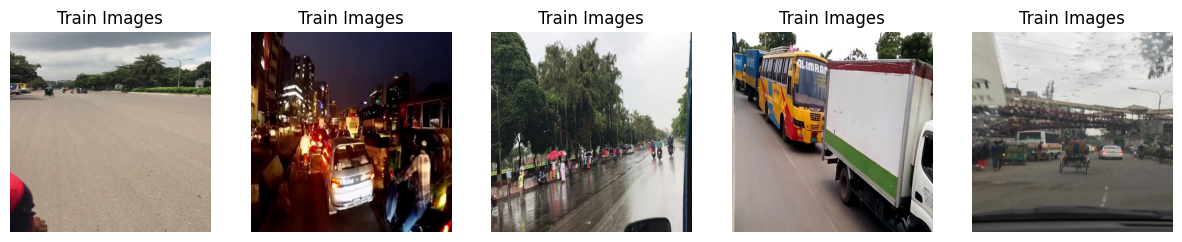

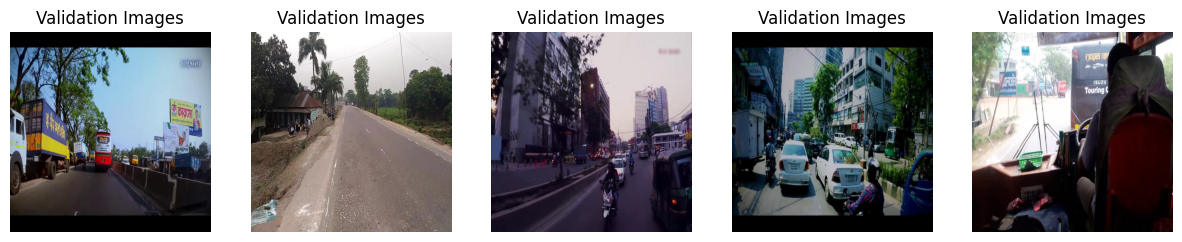

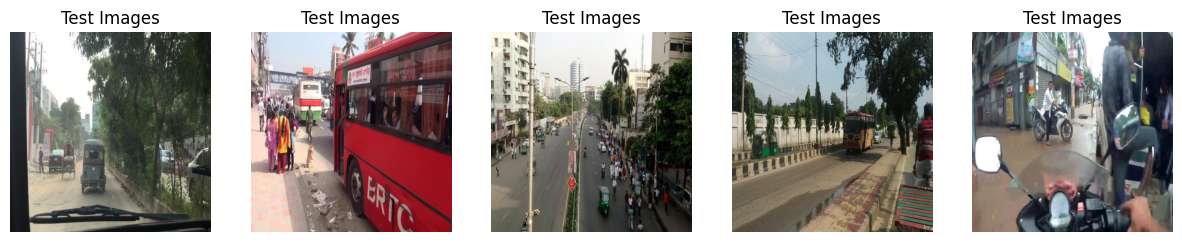

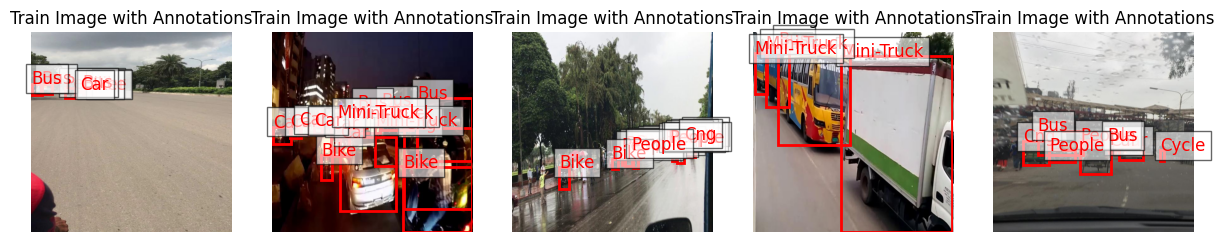

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2
from matplotlib.patches import Rectangle

# Set paths
dataset_dir = '/kaggle/working/Traffic-Congestion-Detection-2/'
train_dir = os.path.join(dataset_dir, 'train', 'images')
val_dir = os.path.join(dataset_dir, 'valid', 'images')
test_dir = os.path.join(dataset_dir, 'test', 'images')

# Function to load image paths
def load_image_paths(directory, num_images=5):
    image_files = [os.path.join(directory, img) for img in os.listdir(directory) if img.endswith('.jpg')]
    return random.sample(image_files, min(num_images, len(image_files)))

# Function to plot images
def plot_images(image_paths, title):
    plt.figure(figsize=(15, 15))
    for i, img_path in enumerate(image_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
    plt.show()

# Load image paths
train_images = load_image_paths(train_dir)
val_images = load_image_paths(val_dir)
test_images = load_image_paths(test_dir)

# Plot images
plot_images(train_images, 'Train Images')
plot_images(val_images, 'Validation Images')
plot_images(test_images, 'Test Images')

# Function to load annotations
def load_annotations(img_path):
    annot_path = img_path.replace('images', 'labels').replace('.jpg', '.txt')
    boxes = []
    if os.path.exists(annot_path):
        with open(annot_path, 'r') as file:
            for line in file.readlines():
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])
                boxes.append((class_id, x_center, y_center, width, height))
    return boxes

# Function to plot images with annotations
def plot_images_with_annotations(image_paths, class_names):
    plt.figure(figsize=(15, 15))
    for i, img_path in enumerate(image_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        boxes = load_annotations(img_path)

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Train Image with Annotations')

        for box in boxes:
            class_id, x_center, y_center, width, height = box
            x = int((x_center - width / 2) * img.shape[1])
            y = int((y_center - height / 2) * img.shape[0])
            w = int(width * img.shape[1])
            h = int(height * img.shape[0])
            rect = Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)
            plt.text(x, y, class_names[class_id], color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
    plt.show()

# Plot training images with annotations
class_names = [
    'Bike', 'Bus', 'Car', 'Cng', 'Cycle', 'Mini-Truck', 'People', 'Rickshaw', 'Truck'
]
plot_images_with_annotations(train_images, class_names)


In [ ]:
CFG.BASE_MODEL_WEIGHTS

'/kaggle/working/yolov10l.pt'

In [ ]:
model = YOLO(CFG.BASE_MODEL_WEIGHTS)

results = model.predict(
    source = example_image_path,

    classes = [0],
    conf = 0.30,
    device = [0], # inference with dual GPU
    imgsz = (img_properties['height'], img_properties['width']),

    save = True,
    save_txt = True,
    save_conf = True,
    exist_ok = True,
)


image 1/1 /kaggle/working/Traffic-Congestion-Detection-2/train/images/Navid_692_jpg.rf.8ffca0030021dd773e86b1f756b93eca.jpg: 640x640 (no detections), 56.4ms
Speed: 5.1ms preprocess, 56.4ms inference, 35.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
0 label saved to runs/detect/predict/labels


In [ ]:
print('Model: ', CFG.BASE_MODEL_WEIGHTS)
print('Epochs: ', CFG.EPOCHS)
print('Batch: ', CFG.BATCH_SIZE)

Model:  /kaggle/working/yolov10l.pt
Epochs:  120
Batch:  6


In [ ]:
### Load pre-trained YOLO model
model = YOLO(CFG.BASE_MODEL_WEIGHTS)

In [ ]:
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 49.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
%%time

# Continue training
model.train(
    data='/kaggle/working/Traffic-Congestion-Detection-2/data.yaml',

    task='detect',

    imgsz=(img_properties['height'], img_properties['width']),

    epochs=CFG.EPOCHS,
    batch=CFG.BATCH_SIZE,
    optimizer=CFG.OPTIMIZER,
    lr0=CFG.LR,
    lrf=CFG.LR_FACTOR,
    weight_decay=CFG.WEIGHT_DECAY,
    dropout=CFG.DROPOUT,
    fraction=CFG.FRACTION,
    patience=CFG.PATIENCE,
    profile=CFG.PROFILE,
    label_smoothing=CFG.LABEL_SMOOTHING,

    name=f'{CFG.BASE_MODEL}_{CFG.EXP_NAME}',
    seed=CFG.SEED,

    val=True,
    amp=True,
    exist_ok=True,
    resume=False,
    device=[0],  # 0
    verbose=False,
)

Ultralytics YOLOv8.2.50 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov10l.pt, data=/kaggle/working/Traffic-Congestion-Detection-2/data.yaml, epochs=120, time=None, patience=20, batch=6, imgsz=(640, 640), save=True, save_period=-1, cache=False, device=[0], workers=8, project=None, name=yolov10l_ppe_css_120_epochs, exist_ok=True, pretrained=True, optimizer=auto, verbose=False, seed=88, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save

100%|██████████| 755k/755k [00:00<00:00, 4.04MB/s]
2024-07-07 16:48:47,600	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-07 16:48:48,401	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1    268800  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 21.1MB/s]


AMP: checks passed ✅
WARNING ⚠️ updating to 'imgsz=640'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'


train: Scanning /kaggle/working/Traffic-Congestion-Detection-2/train/labels... 2321 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2321/2321 [00:01<00:00, 1210.23it/s]


train: New cache created: /kaggle/working/Traffic-Congestion-Detection-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/Traffic-Congestion-Detection-2/valid/labels... 658 images, 0 backgrounds, 0 corrupt: 100%|██████████| 658/658 [00:00<00:00, 1004.50it/s]


val: New cache created: /kaggle/working/Traffic-Congestion-Detection-2/valid/labels.cache
Plotting labels to /kaggle/working/yolov10l_ppe_css_120_epochs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.000515625), 179 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/yolov10l_ppe_css_120_epochs
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      6.27G      2.835      4.423      2.619         93        640: 100%|██████████| 387/387 [02:23<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.29it/s]

                   all        658       5103      0.366       0.34      0.323      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      6.14G      3.138      3.758      2.845         79        640: 100%|██████████| 387/387 [02:15<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.384      0.292      0.268      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      6.07G      3.168      3.708      2.876         56        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103       0.42      0.364      0.346      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      6.06G      3.093      3.521      2.826        110        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.476      0.392      0.389      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      6.09G      3.001      3.382        2.8         50        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.52it/s]

                   all        658       5103      0.574      0.377      0.392      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      6.11G      2.969      3.233      2.754         55        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.614      0.419      0.464      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      6.08G      2.911      3.109      2.727         81        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.505      0.451      0.464      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      5.99G      2.899      2.999      2.675         44        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.52it/s]

                   all        658       5103      0.575       0.44      0.492      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      6.03G      2.814       2.88      2.652        139        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.52it/s]

                   all        658       5103      0.591      0.475       0.51      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      6.02G      2.782      2.783      2.639         33        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.645      0.457      0.502      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      6.02G      2.764       2.71      2.627         84        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.52it/s]

                   all        658       5103      0.641       0.46      0.502      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120       6.1G      2.757      2.674      2.607         34        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.52it/s]

                   all        658       5103      0.636        0.5      0.536      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      6.06G      2.705       2.61      2.587         39        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.50it/s]

                   all        658       5103      0.596      0.533      0.549      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      5.97G      2.642      2.509      2.541         61        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.52it/s]

                   all        658       5103      0.588      0.527      0.549      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      6.02G       2.64      2.527       2.56        141        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.663      0.502      0.565       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      6.03G      2.636      2.394       2.53         39        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.52it/s]

                   all        658       5103      0.665      0.512      0.568       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      6.14G      2.626      2.392      2.527         40        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103       0.66      0.531      0.588      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      6.04G      2.572       2.37      2.519         71        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103       0.69      0.554      0.618      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      5.97G      2.547      2.309      2.507         72        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103       0.64      0.571      0.612      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      6.07G      2.539      2.288      2.491         36        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.658      0.551      0.596      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      6.03G      2.544      2.257      2.498         30        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.674       0.56      0.616      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      6.02G      2.481      2.175      2.456         88        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.709      0.545      0.618      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      6.03G      2.469      2.148      2.436         37        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.50it/s]

                   all        658       5103      0.658      0.559      0.607      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      6.02G      2.461      2.166      2.444         28        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.668      0.571       0.62      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      5.96G      2.462      2.097      2.424         36        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.642      0.568      0.621      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      6.02G      2.454      2.067      2.405         38        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.675      0.598      0.645      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      6.06G       2.44      2.052      2.413        105        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.698      0.581      0.631      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      6.03G      2.415      2.021      2.416         64        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.702      0.593      0.645      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      6.05G      2.397      2.046      2.405         58        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.724      0.578      0.655      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      6.12G      2.375      1.963      2.382         77        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.702       0.59      0.659      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      6.04G      2.376       1.93      2.392         55        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.686      0.606      0.657      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      6.02G       2.35      1.911       2.37         41        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.726      0.596      0.657      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      6.13G      2.331      1.869      2.374         60        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.706      0.611      0.669      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      6.04G       2.34      1.885      2.359         38        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.695      0.613      0.661      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      6.06G      2.302      1.856      2.347         35        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.675      0.611      0.657      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      6.21G      2.271      1.831       2.33         31        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.708      0.601      0.662      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      6.16G      2.316      1.831      2.335         91        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.695      0.611      0.663      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      6.03G      2.258      1.807      2.326         20        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.747      0.605      0.686      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      6.05G      2.256      1.772      2.299         37        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.737      0.596       0.67      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      6.06G       2.27      1.768      2.306         32        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.719      0.621      0.688      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      6.01G      2.251       1.73      2.315         37        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.736      0.623      0.689      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      6.04G      2.234      1.707      2.311         30        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103       0.74      0.613      0.688      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      6.14G       2.21      1.715        2.3         61        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.753      0.612      0.687      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      6.02G      2.202      1.684      2.297         86        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.736       0.61      0.678      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      6.02G      2.195      1.667      2.265         38        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.747      0.609      0.695      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      6.02G      2.189      1.658      2.271         45        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.719      0.624      0.696      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      5.95G      2.186      1.656      2.255         37        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.712      0.632      0.686      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      6.03G      2.166       1.63       2.27         46        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.718      0.649      0.701      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      6.01G      2.158      1.628      2.265         59        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.714      0.649      0.699      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      6.04G      2.138      1.592      2.265         73        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.751      0.631       0.71      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      6.15G      2.126      1.588      2.243         38        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.709      0.649      0.701      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      5.99G      2.126      1.565      2.238         63        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.734      0.623      0.698      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      6.03G      2.114      1.573      2.241         32        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.747      0.633      0.707      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120       6.1G      2.088      1.524       2.22         57        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.756      0.629      0.705      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      6.05G      2.115      1.513      2.214         83        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.761       0.64      0.715      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      6.04G      2.071      1.489      2.204         35        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.761      0.628      0.709       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120       6.2G      2.076      1.518      2.202         43        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.757      0.648      0.721      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      5.96G      2.039      1.461      2.195         15        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.754      0.646      0.718      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      6.02G      2.044      1.475      2.186         44        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.763      0.642      0.719      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      6.02G      2.026      1.449      2.185        135        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.734      0.654      0.713      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      6.02G      2.015      1.454      2.196         56        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.732      0.656      0.713      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      6.04G      2.021      1.433      2.176         72        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.772      0.637      0.716      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      5.99G       2.03      1.405      2.172         80        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.738       0.66      0.719       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      6.04G      2.001      1.396      2.156         51        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.761      0.644      0.712      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      6.02G      1.988      1.377      2.159         45        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103       0.74      0.652       0.71      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      6.02G      2.001      1.405      2.167         33        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.714      0.675       0.72      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      6.05G      1.964      1.355      2.145         63        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.769      0.633      0.724       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      6.25G      1.958      1.364      2.147         39        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.732      0.655      0.715      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      6.12G      1.928       1.32       2.13         33        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103       0.74      0.653      0.715      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      6.01G      1.925      1.327      2.124         56        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.763      0.641      0.726      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      6.02G      1.912      1.282      2.117        125        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103       0.75      0.665      0.728      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      6.14G      1.909      1.295      2.124         47        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.774      0.665      0.738      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      6.02G      1.925       1.31      2.111         18        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.765       0.67      0.733      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      5.98G        1.9      1.259      2.108         65        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.758      0.661      0.724      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      6.15G       1.87      1.243      2.094         51        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.57it/s]

                   all        658       5103      0.781      0.657      0.731      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      6.01G      1.888      1.258      2.106         58        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103       0.76      0.677      0.734      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      6.08G      1.887       1.25      2.096         47        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.752      0.666      0.736      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      6.02G      1.854      1.235      2.091         64        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.774      0.669      0.733      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      6.09G      1.864      1.227      2.094         45        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.769      0.672      0.737      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      5.99G      1.835      1.213      2.079         43        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103       0.76      0.671      0.736        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      6.02G      1.833      1.215      2.085         45        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.803      0.659      0.744      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      6.11G      1.825      1.219      2.079        208        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.783      0.666      0.736      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      6.13G      1.794      1.187      2.069        112        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.784      0.668       0.74      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      6.06G       1.81      1.191      2.074         29        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.756      0.679      0.734        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      5.99G       1.81      1.164      2.055         51        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.805      0.645      0.735        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      6.07G      1.794      1.158      2.051         63        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.773      0.664      0.738      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      6.03G      1.791      1.162      2.056         87        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.776      0.668      0.732      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      6.02G      1.785      1.132      2.045         58        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.797      0.646      0.739      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      6.06G      1.732      1.125      2.042         12        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.57it/s]

                   all        658       5103       0.81      0.651      0.738      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      6.06G      1.743      1.117      2.026         29        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.57it/s]

                   all        658       5103      0.781      0.672      0.743      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      5.97G      1.775      1.121      2.042        159        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.57it/s]

                   all        658       5103      0.782      0.662      0.743      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      6.04G      1.726      1.099       2.03         52        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.792      0.664      0.743       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      6.06G      1.734      1.098      2.026         30        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.782      0.661       0.74      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      6.03G      1.705      1.076      2.027         48        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.767      0.667      0.737      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      6.03G      1.717      1.072       2.02         49        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103       0.75      0.688      0.742      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      5.97G      1.705      1.077      2.007         46        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.795      0.653      0.735       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      6.05G      1.671      1.044      2.002         68        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.778      0.674      0.744      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      6.02G      1.664      1.042      1.996         83        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.802      0.661      0.743      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      6.18G      1.661      1.045      2.001         78        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.56it/s]

                   all        658       5103      0.767       0.68      0.739      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      6.08G      1.667      1.048      1.984         42        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.768      0.683      0.746      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      6.05G      1.659      1.027      1.983         77        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103       0.78       0.67       0.74       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      5.97G      1.642      1.012      1.981         39        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.784      0.662      0.743      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      6.05G      1.614      1.001      1.977         70        640: 100%|██████████| 387/387 [02:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103       0.75      0.686      0.743      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      6.01G      1.633      1.018      1.979         78        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.801       0.66      0.745      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      6.03G      1.628     0.9938      1.972        140        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103       0.77       0.68      0.744      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      6.04G      1.611     0.9895      1.979         77        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.747      0.697      0.749      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      6.12G      1.618     0.9788      1.965         31        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.51it/s]

                   all        658       5103       0.75      0.698      0.744      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      6.04G      1.608     0.9732      1.956        166        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.769       0.68      0.743      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      6.03G      1.588     0.9669      1.963         30        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.794      0.676      0.752      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      6.03G      1.572     0.9587       1.96         20        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.818      0.657       0.75       0.52


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      6.01G      1.479      0.788      1.898         24        640: 100%|██████████| 387/387 [02:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.791      0.669      0.744      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      6.02G      1.467      0.781      1.895         22        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103       0.76      0.691      0.743      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      5.95G      1.451     0.7689      1.883         71        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103        0.8      0.663      0.744       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      6.02G      1.452     0.7654       1.88         11        640: 100%|██████████| 387/387 [02:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.776      0.682      0.743      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      6.02G      1.431     0.7513      1.877         75        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.794       0.67      0.747       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      6.03G      1.422     0.7404      1.865         40        640: 100%|██████████| 387/387 [02:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.799      0.675      0.748      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      6.03G      1.421     0.7331      1.867         38        640: 100%|██████████| 387/387 [02:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.765      0.688      0.747      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      6.01G      1.413     0.7421      1.864         28        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.54it/s]

                   all        658       5103      0.792      0.681      0.746      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      6.06G      1.399     0.7284       1.86         36        640: 100%|██████████| 387/387 [02:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.53it/s]

                   all        658       5103      0.801      0.669      0.746      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      6.01G        1.4     0.7223      1.851         23        640: 100%|██████████| 387/387 [02:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.55it/s]

                   all        658       5103      0.794      0.676      0.746      0.517



120 epochs completed in 5.046 hours.
Optimizer stripped from /kaggle/working/yolov10l_ppe_css_120_epochs/weights/last.pt, 52.2MB
Optimizer stripped from /kaggle/working/yolov10l_ppe_css_120_epochs/weights/best.pt, 52.2MB

Validating /kaggle/working/yolov10l_ppe_css_120_epochs/weights/best.pt...
Ultralytics YOLOv8.2.50 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10l summary (fused): 461 layers, 25730246 parameters, 0 gradients, 126.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:18<00:00,  3.03it/s]


                   all        658       5103      0.794      0.675      0.752      0.523
Speed: 0.2ms preprocess, 17.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /kaggle/working/yolov10l_ppe_css_120_epochs
CPU times: user 4h 42min 4s, sys: 26min 50s, total: 5h 8min 54s
Wall time: 5h 3min 47s


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b79d718a530>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [ ]:
# Export the model
model.export(
    format = 'onnx', # openvino, onnx, engine, tflite
    imgsz = (img_properties['height'], img_properties['width']),
    half = False,
    int8 = False,
    simplify = False,
    nms = False,
)

Ultralytics YOLOv8.2.50 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10l summary (fused): 461 layers, 25730246 parameters, 0 gradients, 126.4 GFLOPs

PyTorch: starting from '/kaggle/working/yolov10l_ppe_css_120_epochs/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (49.8 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 3.2s, saved as '/kaggle/working/yolov10l_ppe_css_120_epochs/weights/best.onnx' (93.0 MB)

Export complete (4.3s)
Results saved to /kaggle/working/yolov10l_ppe_css_120_epochs/weights
Predict:         yolo predict task=detect model=/kaggle/working/yolov10l_ppe_css_120_epochs/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/yolov10l_ppe_css_120_epochs/weights/best.onnx imgsz=640 data=/kaggle/working/Traffic-Congestion-Detection-2/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/yolov10l_ppe_css_120_epochs/weights/best.onnx'

In [ ]:
import os
import zipfile

def zip_directory(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)
                zipf.write(file_path, arcname)

# Specify the directory you want to zip
directory_to_zip = '/kaggle/working/yolov10l_ppe_css_120_epochs'

# Specify the output zip file path
output_zip_file = '/kaggle/working/yolov10l_ppe_css_120_epochs.zip'

# Create the zip file
zip_directory(directory_to_zip, output_zip_file)

print(f"Directory '{directory_to_zip}' has been zipped to '{output_zip_file}'")


Directory '/kaggle/working/yolov10l_ppe_css_120_epochs' has been zipped to '/kaggle/working/yolov10l_ppe_css_120_epochs.zip'
